In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
!gdown 1q8KKl03WBxrhcwCZcLDrlavVYyUfUdlf

Downloading...
From: https://drive.google.com/uc?id=1q8KKl03WBxrhcwCZcLDrlavVYyUfUdlf
To: /content/myntrasales.xlsx
100% 13.7k/13.7k [00:00<00:00, 44.7MB/s]


In [ ]:
df=pd.read_excel('myntrasales.xlsx')

In [ ]:
df.head()

,DATE,Sales
0,2001-01-01,6519.0
1,2001-02-01,6654.0
2,2001-03-01,7332.0
3,2001-04-01,7332.0
4,2001-05-01,8240.0


In [ ]:
df.describe()

,Sales
count,198.000000
mean,10842.757576
std,2605.006293
min,108.000000
25%,8856.000000
50%,10745.000000
75%,12399.750000
max,23740.000000


In [ ]:
df.describe(include='datetime')

<ipython-input-6-41adad5e0539>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include='datetime')


,DATE
count,217
unique,217
top,2001-01-01 00:00:00
freq,1
first,2001-01-01 00:00:00
last,2019-01-01 00:00:00


In [ ]:
18*12+1

217

In [ ]:
df.isna().sum()

DATE      0
Sales    19
dtype: int64

In [ ]:
#we can see that there are missing values in sales but we cant see them in
#graph because lineplot gives smooth line between points and fills all missing data

In [ ]:
df.set_index('DATE',inplace=True)

In [ ]:
df.head()

,Sales
DATE,
2001-01-01,6519.0
2001-02-01,6654.0
2001-03-01,7332.0
2001-04-01,7332.0
2001-05-01,8240.0


<Axes: xlabel='DATE'>

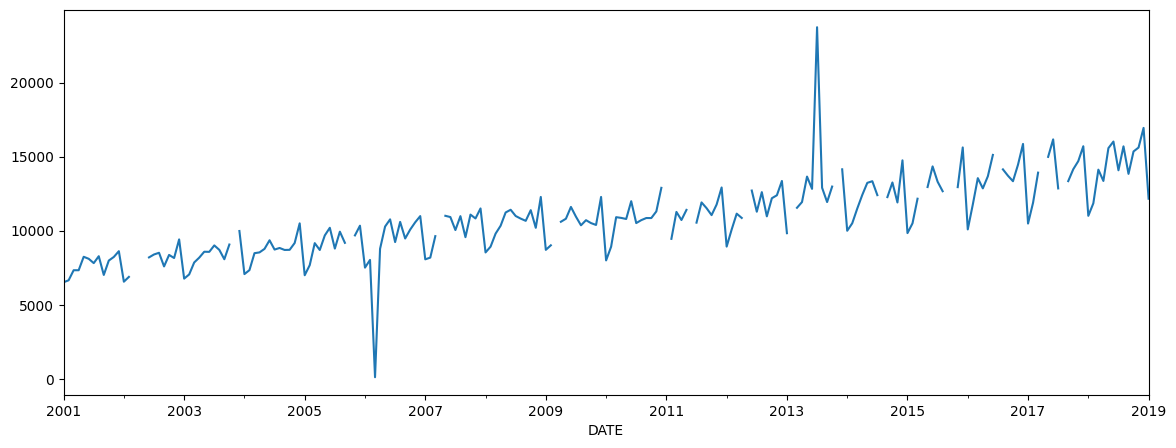

In [ ]:
plt.figure(figsize=(14,5))
df['Sales'].plot()

In [ ]:
df.loc[df['Sales'].isna()]

,Sales
DATE,
2002-03-01,NaN
2002-04-01,NaN
2002-05-01,NaN
2003-11-01,NaN
2005-10-01,NaN
2007-04-01,NaN
2009-03-01,NaN
2011-01-01,NaN
2011-06-01,NaN


<Axes: xlabel='DATE'>

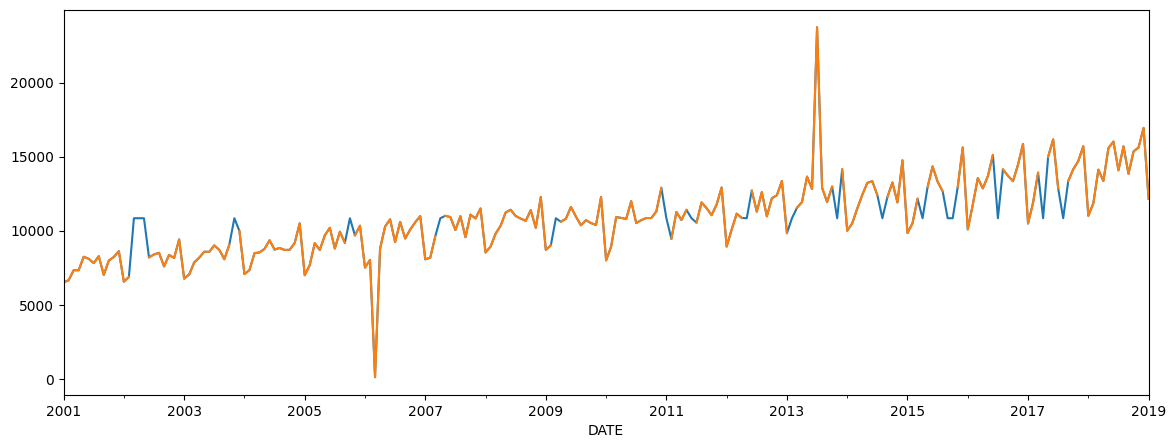

In [ ]:
plt.figure(figsize=(14,5))
df['Sales'].fillna(np.mean(df['Sales'])).plot(label='imputed')
df['Sales'].plot(label='original')

<Axes: xlabel='DATE'>

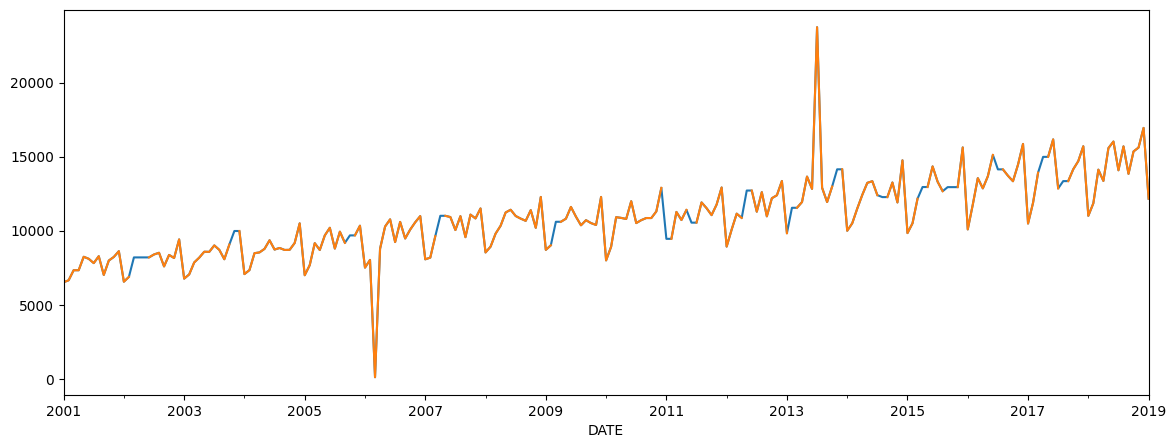

In [ ]:
plt.figure(figsize=(14,5))
df['Sales'].fillna(method='bfill').plot(label='imputed')
df['Sales'].plot(label='original')
# we can see all the next values of nan have filled in backward direction to fill nan

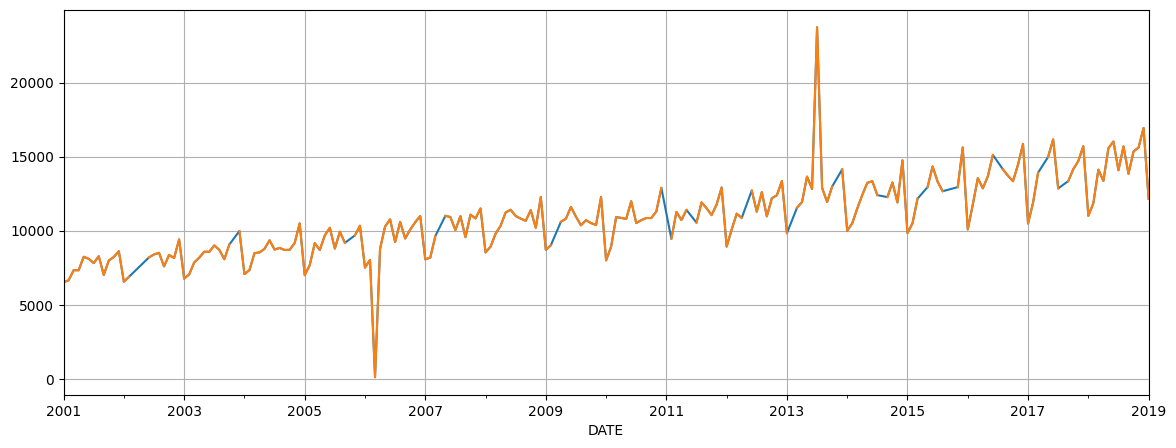

In [ ]:
plt.figure(figsize=(14,5))
df['Sales'].interpolate(method='linear').plot(label='imputed')
df['Sales'].plot(label='original')
plt.grid()

In [ ]:
df['Sales']=df['Sales'].interpolate(method='linear')

In [ ]:
np.percentile(df,99)

16144.480000000001

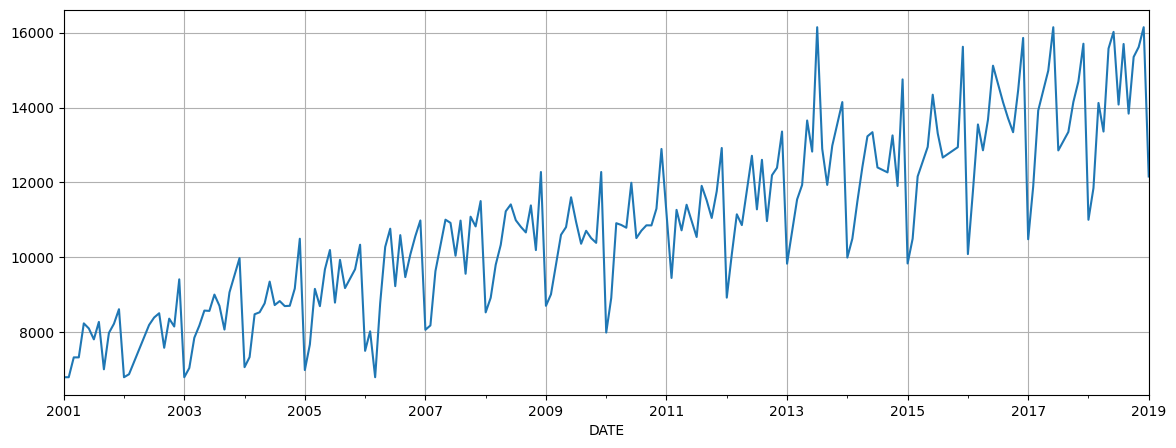

In [ ]:
plt.figure(figsize=(14,5))
df['Sales'].clip(upper=np.percentile(df['Sales'],99),lower=np.percentile(df['Sales'],2)).plot()
plt.grid()

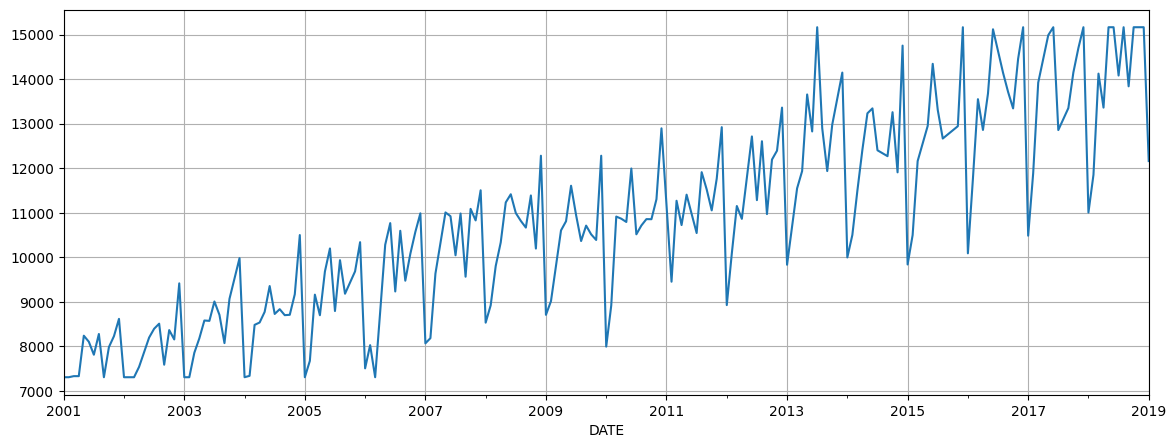

In [ ]:
plt.figure(figsize=(14,5))
df['Sales'].clip(upper=np.percentile(df['Sales'],95),lower=np.percentile(df['Sales'],5)).plot()
plt.grid()

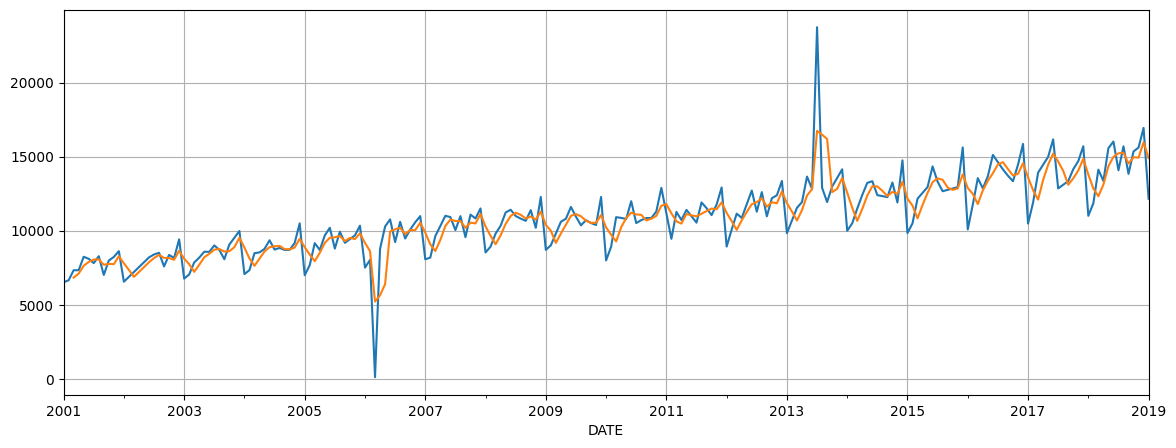

In [ ]:
#the first graph looks much better as it doesnt contains unnecessary flatness
plt.figure(figsize=(14,5))
df['Sales'].plot(label='original')
df['Sales'].rolling(3,center=False).mean().plot(label='smoothed')
plt.grid()

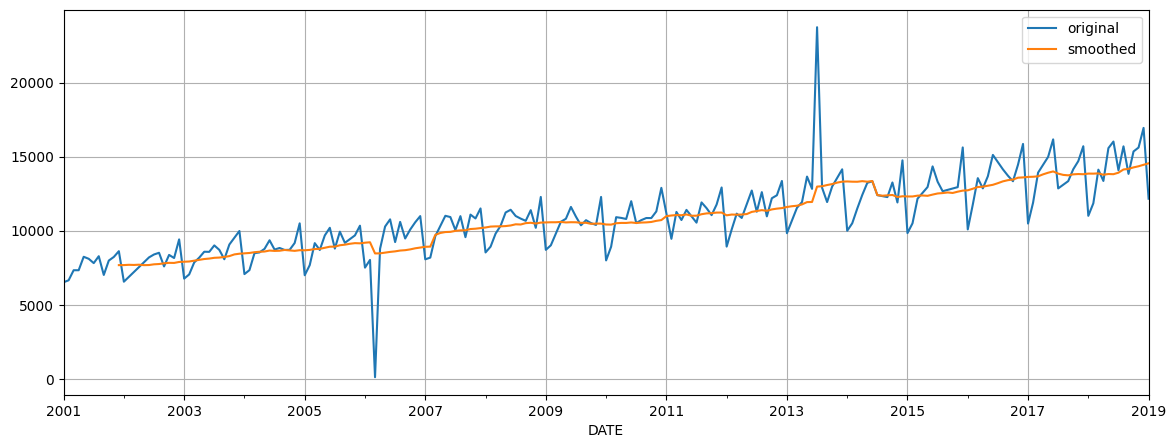

In [ ]:
plt.figure(figsize=(14,5))
df['Sales'].plot(label='original')
df['Sales'].rolling(12,center=False).mean().plot(label='smoothed')
plt.legend()
plt.grid()

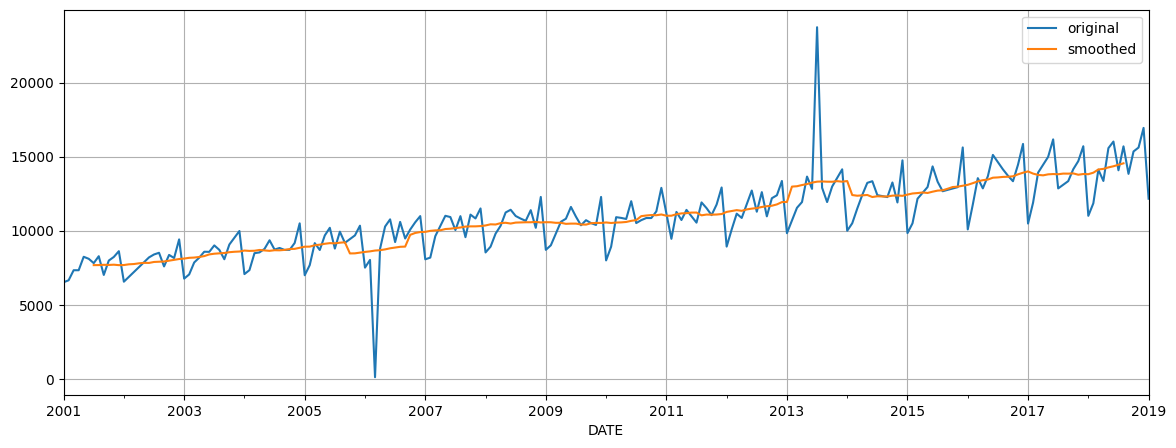

In [ ]:
plt.figure(figsize=(14,5))
df['Sales'].plot(label='original')
df['Sales'].rolling(12,center=True).mean().plot(label='smoothed')
plt.legend()
plt.grid()
#centre =True means 6 from back and 6 from front to take avg

In [ ]:
import statsmodels.api as sm
df['Sales']=df['Sales'].clip(upper=np.percentile(df['Sales'],99),lower=np.percentile(df['Sales'],2))

In [ ]:
model=sm.tsa.seasonal_decompose(df['Sales'],model='additive')

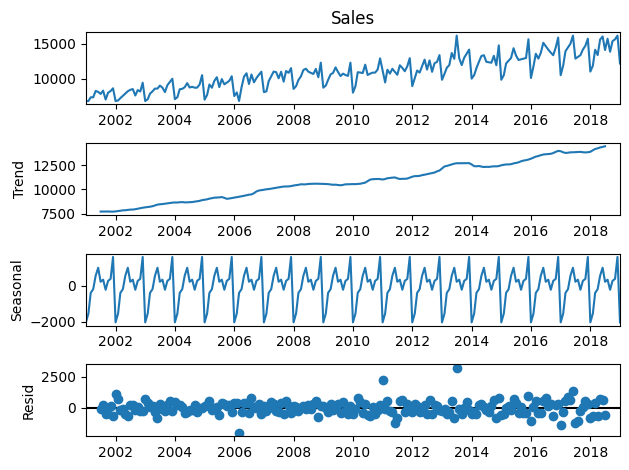

In [ ]:
model.plot();#semicolon avoids repeation of the plots

<Axes: xlabel='resid', ylabel='Count'>

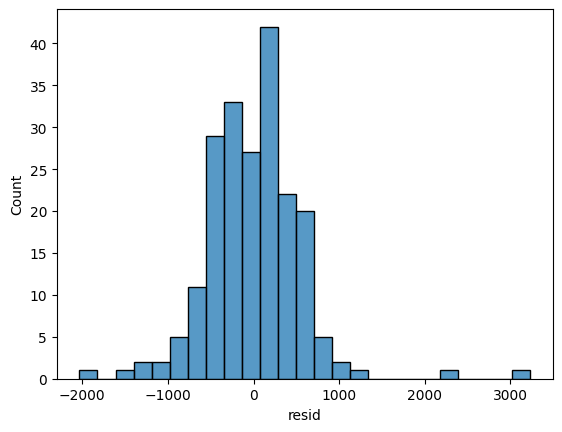

In [ ]:
sns.histplot(model.resid)

<Axes: xlabel='DATE'>

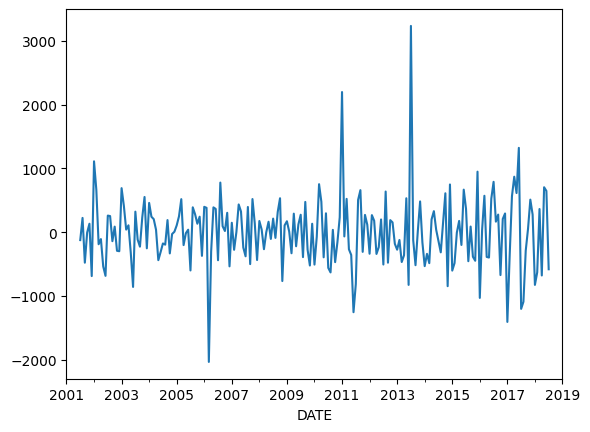

In [ ]:
model.resid.plot()

In [ ]:
model.resid.mean()

-3.1105015432094563

In [ ]:
X_test=df.iloc[-12:]
X_test

,Sales
DATE,
2018-02-01,11852.00
2018-03-01,14123.00
2018-04-01,13360.00
2018-05-01,15576.00
2018-06-01,16021.00
2018-07-01,14080.00
2018-08-01,15697.00
2018-09-01,13838.00
2018-10-01,15351.00


In [ ]:
X_train=df.iloc[:-12]
X_train

,Sales
DATE,
2001-01-01,6802.44
2001-02-01,6802.44
2001-03-01,7332.00
2001-04-01,7332.00
2001-05-01,8240.00
...,...
2017-09-01,13349.00
2017-10-01,14150.00
2017-11-01,14698.00


In [ ]:
from sklearn.metrics import mean_squared_error as mse,mean_absolute_error as mae,mean_absolute_percentage_error as mape

In [ ]:
def performance(actual,predicted):
  print('MAE',mae(actual,predicted))
  print('RMSE',mse(actual,predicted)**0.5)
  print('MAPE',mape(actual,predicted))


In [ ]:
#Simple avg method
X_train.mean()
X_test['pred']=X_train['Sales'].mean()

<ipython-input-34-6b6ccfa8f551>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['pred']=X_train['Sales'].mean()


In [ ]:
X_test

,Sales,pred
DATE,,
2018-02-01,11852.00,10656.712976
2018-03-01,14123.00,10656.712976
2018-04-01,13360.00,10656.712976
2018-05-01,15576.00,10656.712976
2018-06-01,16021.00,10656.712976
2018-07-01,14080.00,10656.712976
2018-08-01,15697.00,10656.712976
2018-09-01,13838.00,10656.712976
2018-10-01,15351.00,10656.712976


MAE 3828.077024390244
RMSE 4082.145593895992
MAPE 0.2566898932003647


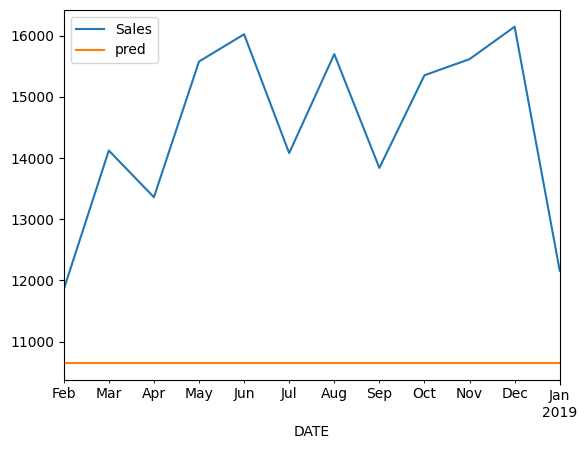

In [ ]:
X_test.plot()
performance(X_test['Sales'],X_test['pred'])

In [ ]:
#Naive method
X_test['pred']=X_train['Sales'][-1]

<ipython-input-37-ab8abe1f6a6a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['pred']=X_train['Sales'][-1]


MAE 3479.7900000000004
RMSE 3757.4828528151666
MAPE 0.23239673020639506


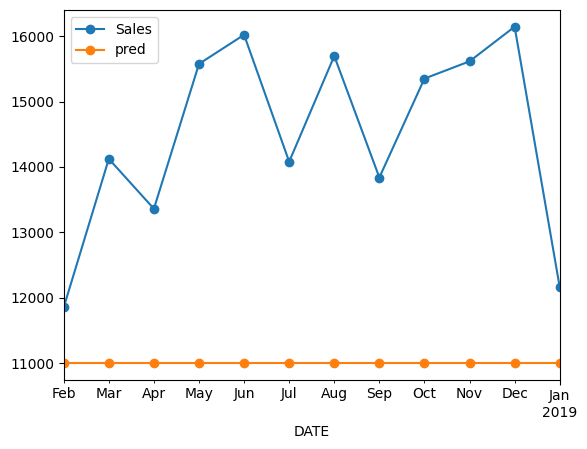

In [ ]:
X_test.plot(style='-o')
performance(X_test['Sales'],X_test['pred'])

In [ ]:
#lets copy seasonality
for i in X_test.index:
  X_test.loc[i,'pred']=X_train.loc[i-pd.DateOffset(years=1),'Sales']

In [ ]:
X_test

,Sales,pred
DATE,,
2018-02-01,11852.00,11891.00
2018-03-01,14123.00,13921.00
2018-04-01,13360.00,14453.50
2018-05-01,15576.00,14986.00
2018-06-01,16021.00,16144.48
2018-07-01,14080.00,12856.00
2018-08-01,15697.00,13102.50
2018-09-01,13838.00,13349.00
2018-10-01,15351.00,14150.00


In [ ]:
X_train.tail(12)

,Sales
DATE,
2017-02-01,11891.00
2017-03-01,13921.00
2017-04-01,14453.50
2017-05-01,14986.00
2017-06-01,16144.48
2017-07-01,12856.00
2017-08-01,13102.50
2017-09-01,13349.00
2017-10-01,14150.00


MAE 839.0800000000003
RMSE 1075.541702306331
MAPE 0.05765106957264454


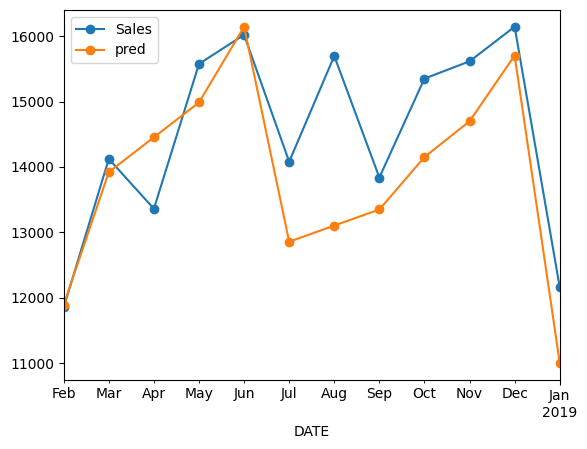

In [ ]:
X_test.plot(style='-o')
performance(X_test['Sales'],X_test['pred'])

In [ ]:
pd.DataFrame(index=pd.date_range(start=df.index[-1],periods=12,freq='MS'))

""
2019-01-01
2019-02-01
2019-03-01
2019-04-01
2019-05-01
2019-06-01
2019-07-01
2019-08-01
2019-09-01
2019-10-01


In [ ]:
df.tail()

,Sales
DATE,
2018-09-01,13838.00
2018-10-01,15351.00
2018-11-01,15615.00
2018-12-01,16144.48
2019-01-01,12160.00


In [ ]:
temp=df
df=df.append(pd.DataFrame(index=pd.date_range(start=df.index[-1],periods=13,freq='MS'))[1:])
df.tail(20)

<ipython-input-45-34dc42e2484f>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(pd.DataFrame(index=pd.date_range(start=df.index[-1],periods=13,freq='MS'))[1:])


,Sales
2018-06-01,16021.00
2018-07-01,14080.00
2018-08-01,15697.00
2018-09-01,13838.00
2018-10-01,15351.00
2018-11-01,15615.00
2018-12-01,16144.48
2019-01-01,12160.00
2019-02-01,NaN
2019-03-01,NaN


In [ ]:
pred=df['Sales'].dropna().values


In [ ]:
pred

array([ 6802.44      ,  6802.44      ,  7332.        ,  7332.        ,
        8240.        ,  8104.        ,  7813.        ,  8279.        ,
        7014.        ,  7985.        ,  8229.        ,  8618.        ,
        6802.44      ,  6882.        ,  7211.        ,  7540.        ,
        7869.        ,  8198.        ,  8396.        ,  8510.        ,
        7589.        ,  8366.        ,  8156.        ,  9415.        ,
        6802.44      ,  7048.        ,  7856.        ,  8181.        ,
        8581.        ,  8573.        ,  9008.        ,  8708.        ,
        8074.        ,  9068.        ,  9524.5       ,  9981.        ,
        7071.        ,  7339.        ,  8483.        ,  8536.        ,
        8774.        ,  9355.        ,  8728.        ,  8835.        ,
        8701.        ,  8709.        ,  9170.        , 10499.        ,
        6994.        ,  7675.        ,  9161.        ,  8699.        ,
        9682.        , 10198.        ,  8794.        ,  9935.        ,
      

In [ ]:
for i  in range(12):
  pred=np.append(pred,pred[-3:].mean())

In [ ]:
pred[-20:]

array([16021.        , 14080.        , 15697.        , 13838.        ,
       15351.        , 15615.        , 16144.48      , 12160.        ,
       14639.82666667, 14314.76888889, 13704.86518519, 14219.82024691,
       14079.818107  , 14001.5011797 , 14100.37984454, 14060.56637708,
       14054.14913377, 14071.69845179, 14062.13798755, 14062.6618577 ])

In [ ]:
df['pred']=pred

In [ ]:
df

,Sales,pred
2001-01-01,6802.44,6802.440000
2001-02-01,6802.44,6802.440000
2001-03-01,7332.00,7332.000000
2001-04-01,7332.00,7332.000000
2001-05-01,8240.00,8240.000000
...,...,...
2019-09-01,NaN,14060.566377
2019-10-01,NaN,14054.149134
2019-11-01,NaN,14071.698452
2019-12-01,NaN,14062.137988


In [ ]:
df.loc[df['Sales'].isna()==False,'pred']=np.nan

In [ ]:
df

,Sales,pred
2001-01-01,6802.44,NaN
2001-02-01,6802.44,NaN
2001-03-01,7332.00,NaN
2001-04-01,7332.00,NaN
2001-05-01,8240.00,NaN
...,...,...
2019-09-01,NaN,14060.566377
2019-10-01,NaN,14054.149134
2019-11-01,NaN,14071.698452
2019-12-01,NaN,14062.137988


<Axes: >

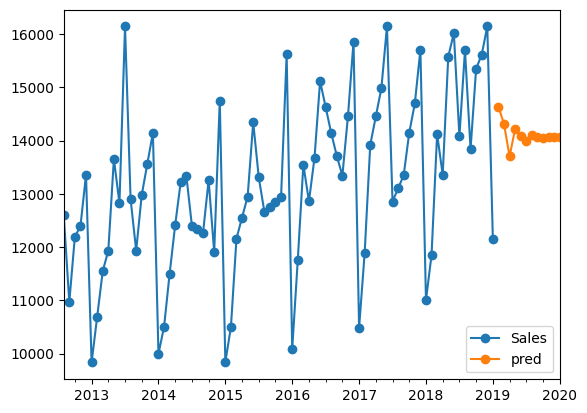

In [ ]:
df.tail(90).plot(style='-o')

In [ ]:
from pandas.core.generic import Frequency
df=X_train
df=df.append(pd.DataFrame(index=pd.date_range(start=df.index[-1],periods=13,freq='MS'))[1:])

<ipython-input-55-5da340906a36>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(pd.DataFrame(index=pd.date_range(start=df.index[-1],periods=13,freq='MS'))[1:])


In [ ]:
pred=df['Sales'].dropna().values
for i in range(12):
  pred=np.append(pred,pred[-3:].mean())

<ipython-input-57-4f1303c85aeb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['pred']=pred[-12:]


MAE 1738.0237010756282
RMSE 1940.884523601963
MAPE 0.11731718726677055


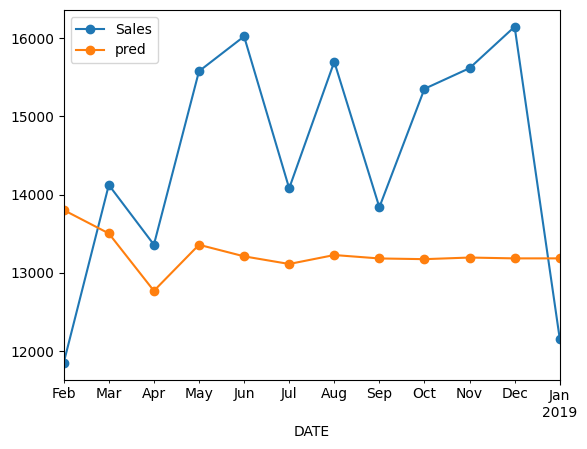

In [ ]:
X_test['pred']=pred[-12:]
X_test.plot(style='-o')
performance(X_test['Sales'],X_test['pred'])

In [ ]:
df_new=df
df=temp

In [ ]:
df=temp

In [ ]:
model=pd.Series(sm.tsa.SimpleExpSmoothing(df['Sales']).fit(smoothing_level=0.8).fittedvalues)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
model

DATE
2001-01-01     6825.057158
2001-02-01     6806.963432
2001-03-01     6803.344686
2001-04-01     7226.268937
2001-05-01     7310.853787
                  ...     
2018-09-01    15444.233816
2018-10-01    14159.246763
2018-11-01    15112.649353
2018-12-01    15514.529871
2019-01-01    16018.489974
Length: 217, dtype: float64

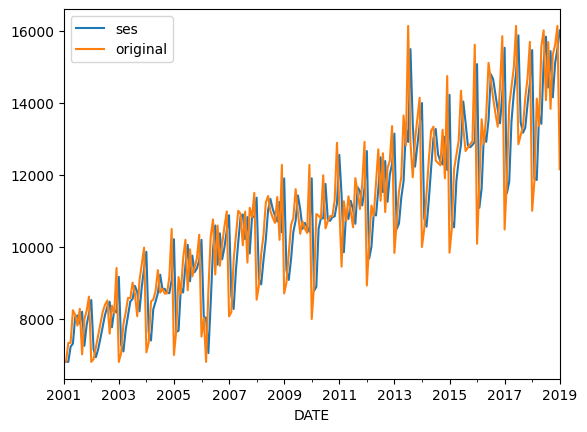

In [ ]:
model.plot(label='ses')
df['Sales'].plot(label='original')
plt.legend()
# as it is on training model

In [ ]:
#trend =1/2*seasonality
model=pd.Series(sm.tsa.SimpleExpSmoothing(df['Sales']).fit(1/24).fittedvalues)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<Axes: xlabel='DATE'>

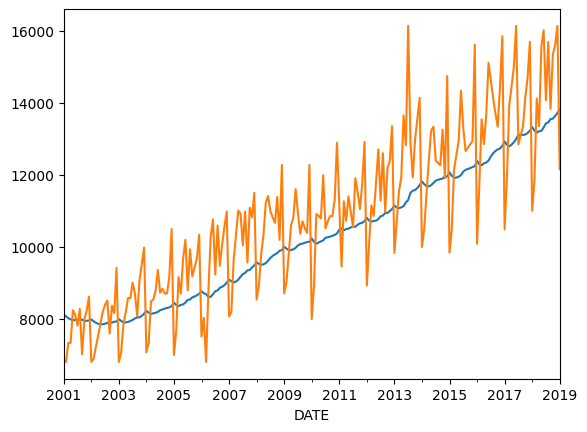

In [ ]:
model.plot()
df['Sales'].plot()

In [ ]:
model=sm.tsa.SimpleExpSmoothing(df['Sales']).fit(0.8)
pred=model.forecast(steps=12)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<Axes: xlabel='DATE'>

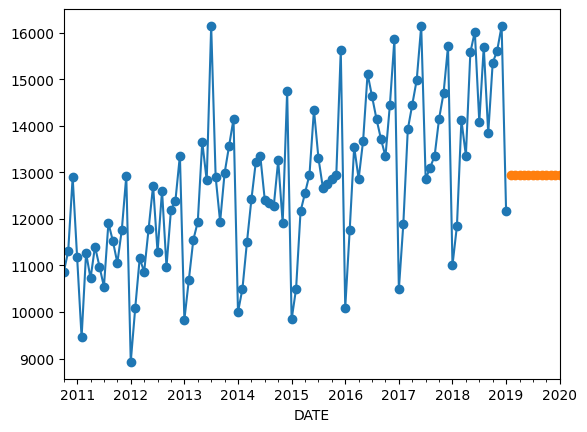

In [ ]:
df['Sales'].tail(100).plot(style='-o')
pred.plot(style='-o')

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
<ipython-input-67-8e418e928a0a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['pred']=model.forecast(12)


MAE 1658.266339797937
RMSE 1888.7176076173519
MAPE 0.11096065125430805


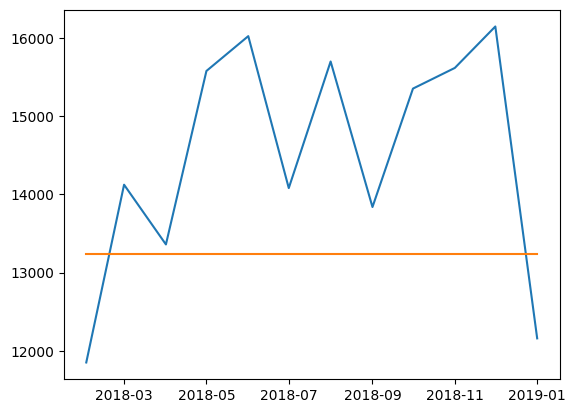

In [ ]:
model=sm.tsa.SimpleExpSmoothing(X_train['Sales']).fit(1/24)
X_test['pred']=model.forecast(12)
plt.plot(X_test)
performance(X_test['Sales'],X_test['pred'])\
# if we give very high value of it gives much weightage to last few points and if
# those few points are different from test,we get drastic errors so trend line is best

In [ ]:
model=sm.tsa.ExponentialSmoothing(df['Sales'],'additive').fit(0.6)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


<Axes: xlabel='DATE'>

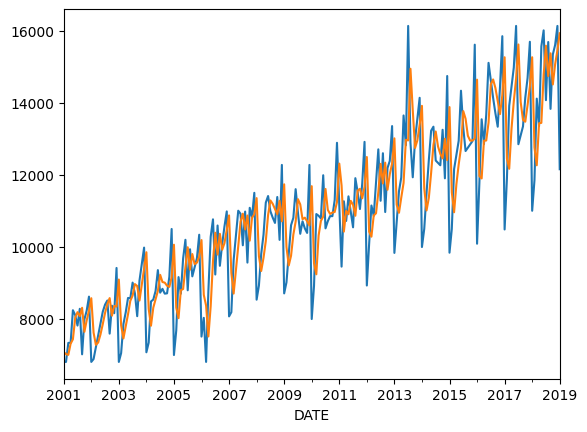

In [ ]:
df['Sales'].plot()
model.fittedvalues.plot()

<Axes: xlabel='DATE'>

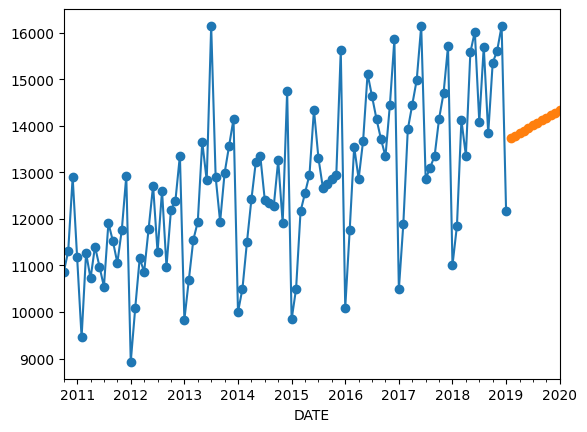

In [ ]:
df['Sales'].tail(100).plot(style='-o')
model.forecast(12).plot(style='-o')

In [ ]:
model=sm.tsa.ExponentialSmoothing(X_train['Sales'],'additive').fit(1/24)
X_test['pred']=model.forecast(12)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
<ipython-input-71-d333b63b2396>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['pred']=model.forecast(12)


MAE 1206.333031360747
RMSE 1402.7154282937136
MAPE 0.08527234423164061


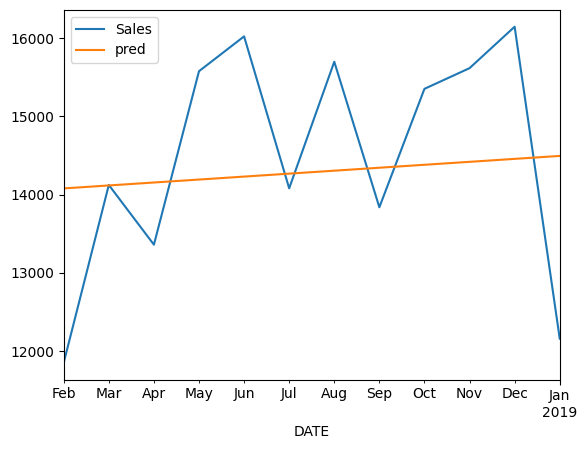

In [ ]:
X_test.plot()
performance(X_test['Sales'],X_test['pred'])

In [ ]:
model=sm.tsa.ExponentialSmoothing(df['Sales'],'additive',seasonal='additive').fit(0.56)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<Axes: xlabel='DATE'>

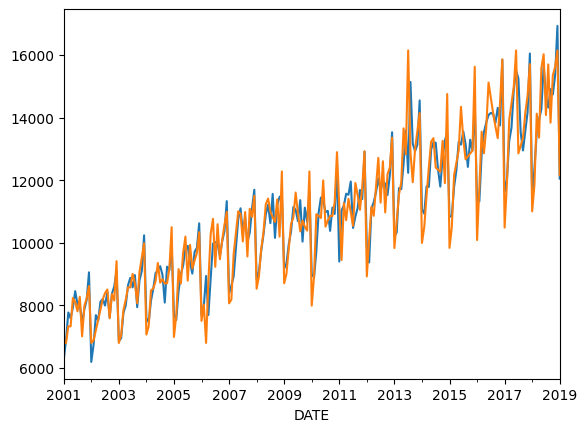

In [ ]:
model.fittedvalues.plot()
df['Sales'].plot()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<Axes: xlabel='DATE'>

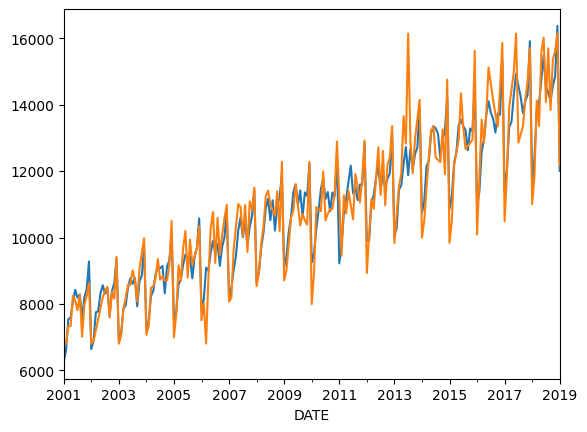

In [ ]:
model=sm.tsa.ExponentialSmoothing(df['Sales'],trend='additive',seasonal='additive').fit(1/24)
model.fittedvalues.plot()
df['Sales'].plot()

<Axes: xlabel='DATE'>

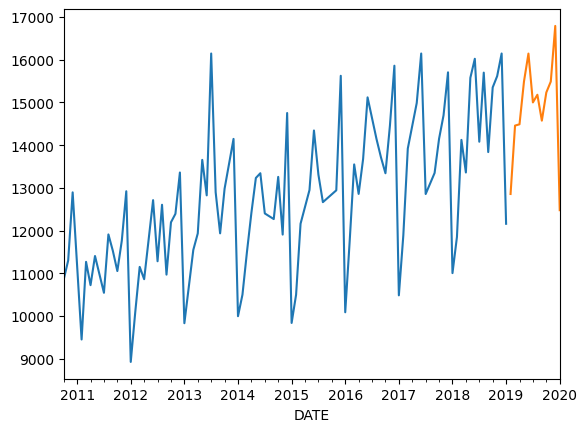

In [ ]:
df['Sales'].tail(100).plot()
model.forecast(12).plot()

In [ ]:
model=sm.tsa.ExponentialSmoothing(X_train['Sales'],'additive',seasonal='additive').fit(0.56)
X_test['pred']=model.forecast(12)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
<ipython-input-77-437f53aeb934>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['pred']=model.forecast(12)


MAE 683.9587703033304
RMSE 837.6330158385126
MAPE 0.046237753589218424


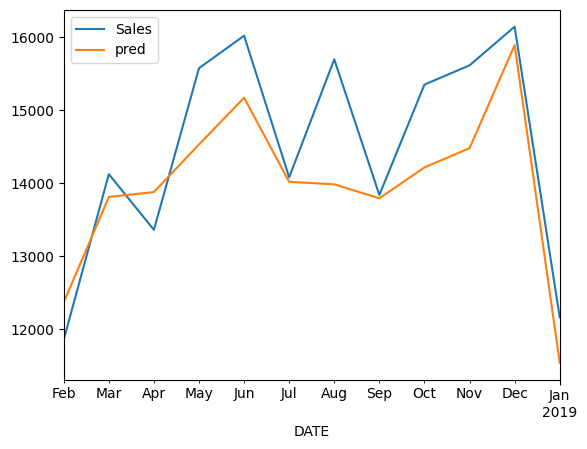

In [ ]:
X_test.plot()
performance(X_test['Sales'],X_test['pred'])

#Dickey-Fuller-Test
#Null Hypothesis=not stationary
#Alternate hypothesis=Stationary

In [ ]:
sm.tsa.stattools.adfuller(df['Sales'])[1]

0.9805359227751874

In [ ]:
detrend=df['Sales'].diff()
detrend

DATE
2001-01-01        NaN
2001-02-01       0.00
2001-03-01     529.56
2001-04-01       0.00
2001-05-01     908.00
               ...   
2018-09-01   -1859.00
2018-10-01    1513.00
2018-11-01     264.00
2018-12-01     529.48
2019-01-01   -3984.48
Name: Sales, Length: 217, dtype: float64

<Axes: xlabel='DATE'>

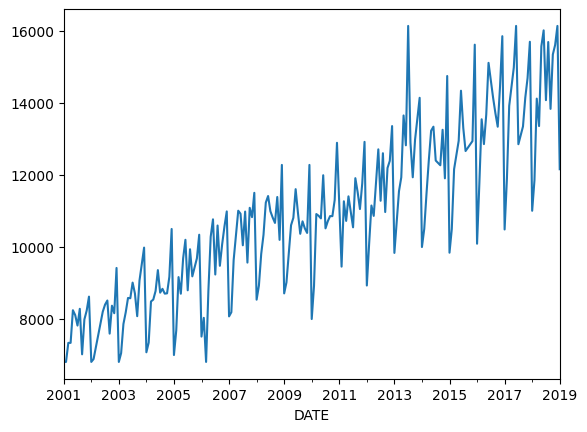

In [ ]:
df['Sales'].plot()

<Axes: xlabel='DATE'>

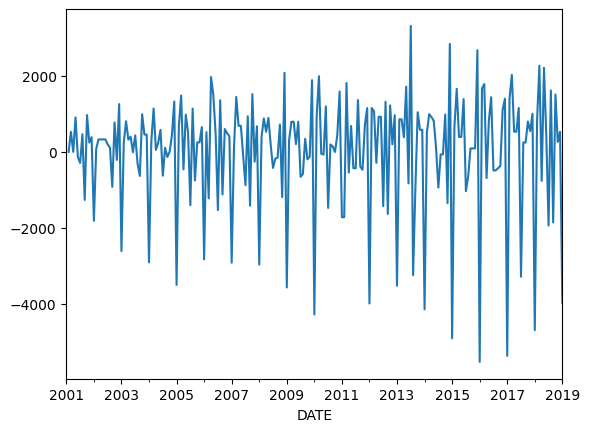

In [ ]:
detrend.plot()

<Axes: xlabel='DATE'>

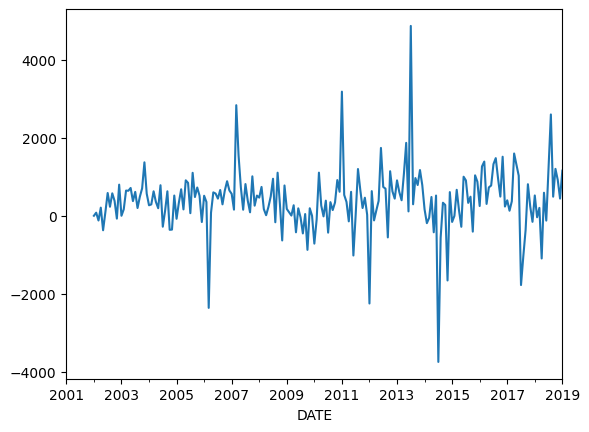

In [ ]:
deseas=df['Sales'].diff(12)
deseas.plot()

<Axes: xlabel='DATE'>

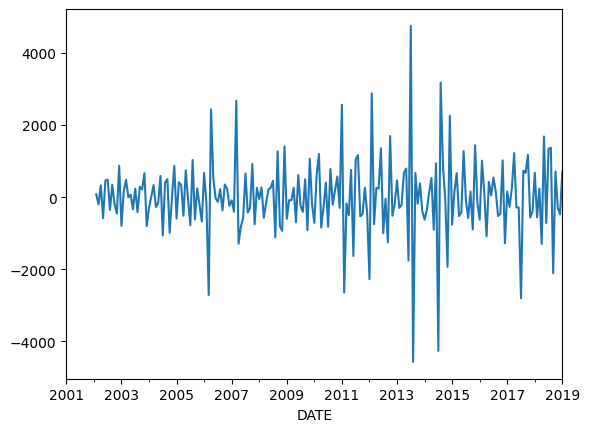

In [ ]:
stationary=df['Sales'].diff(1).diff(12)
stationary.plot()

In [ ]:
sm.tsa.stattools.adfuller(stationary.dropna())[1]

1.6981202818214683e-06

<Axes: xlabel='DATE'>

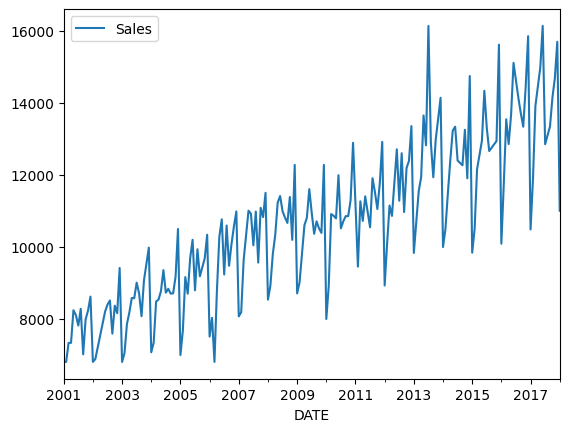

In [ ]:
# sequence is stationary as pval<0.
X_train_st=X_train.copy()
X_train_st['Sales']=X_train['Sales'].diff(1)
X_train.plot()

In [ ]:
X_train_st.dropna(inplace=True)

In [ ]:
sm.tsa.stattools.adfuller(X_train_st)[1]

2.225528143773166e-06

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
model=SARIMAX(X_train_st['Sales'],order=(1,0,0))
model=model.fit(X_train_st)
#we need to save model here we cant just use model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
X_test['pred']=model.forecast(12)

<ipython-input-91-8ab5cd876a5b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['pred']=model.forecast(12)


In [ ]:
X_test['pred']

DATE
2018-02-01    1738.553063
2018-03-01    -643.236168
2018-04-01     237.986850
2018-05-01     -88.051238
2018-06-01      32.577516
2018-07-01     -12.053148
2018-08-01       4.459467
2018-09-01      -1.649930
2018-10-01       0.610447
2018-11-01      -0.225855
2018-12-01       0.083563
2019-01-01      -0.030917
Name: pred, dtype: float64

In [ ]:
X_train['Sales'][-1]+X_test['pred'].cumsum()

DATE
2018-02-01    12743.553063
2018-03-01    12100.316895
2018-04-01    12338.303746
2018-05-01    12250.252508
2018-06-01    12282.830024
2018-07-01    12270.776876
2018-08-01    12275.236344
2018-09-01    12273.586414
2018-10-01    12274.196861
2018-11-01    12273.971005
2018-12-01    12274.054568
2019-01-01    12274.023651
Name: pred, dtype: float64

In [ ]:
X_test['pred']=X_train['Sales'][-1]+X_test['pred'].cumsum()

<ipython-input-94-1d5dceddc7b2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['pred']=X_train['Sales'][-1]+X_test['pred'].cumsum()


MAE 2349.7942895420715
RMSE 2646.0035842726475
MAPE 0.1554005836289112


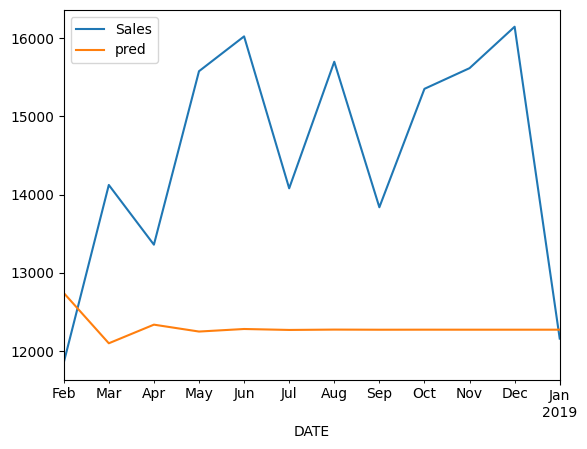

In [ ]:
X_test.plot()
performance(X_test['Sales'],X_test['pred'])

#MA

In [ ]:
model=SARIMAX(X_train_st,order=(0,0,1))
model=model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
X_test['pred']=model.forecast(12)

<ipython-input-99-8ab5cd876a5b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['pred']=model.forecast(12)


In [ ]:
X_test['pred']=X_train['Sales'][-1]+X_test['pred'].cumsum()

<ipython-input-101-1d5dceddc7b2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['pred']=X_train['Sales'][-1]+X_test['pred'].cumsum()


MAE 1399.8107354641695
RMSE 1614.3040079366917
MAPE 0.09538299128624834


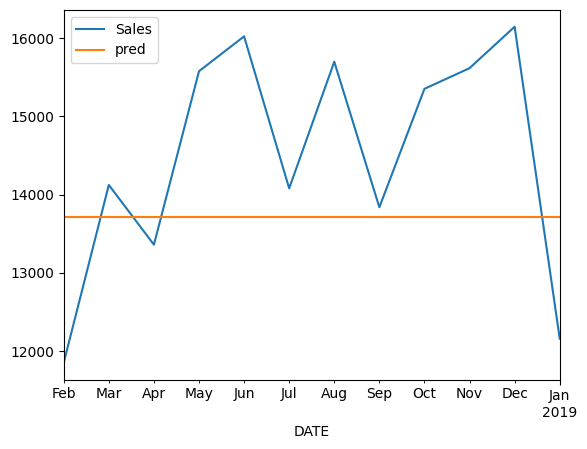

In [ ]:
X_test.plot()
performance(X_test['Sales'],X_test['pred'])

# ACF and PACF

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf

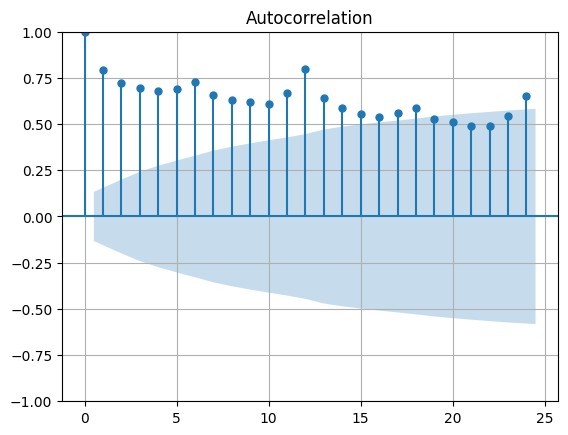

In [ ]:
plot_acf(df['Sales'])
plt.grid()

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


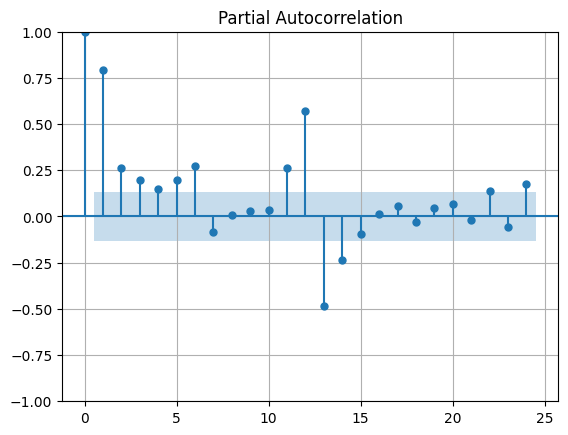

In [ ]:
plot_pacf(df['Sales'])
plt.grid()

#ARMA

In [ ]:
model=SARIMAX(X_train_st['Sales'],order=(12,0,3))
model=model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
X_test['pred']=X_train['Sales'][-1]+model.forecast(12).cumsum()

<ipython-input-171-c3b970bf19ef>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['pred']=X_train['Sales'][-1]+model.forecast(12).cumsum()


MAE 677.9945180731819
RMSE 895.1096577328307
MAPE 0.047105009805434174


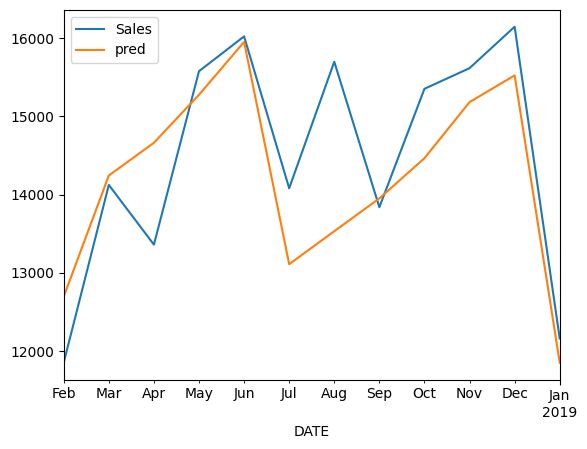

In [ ]:
X_test.plot()
performance(X_test['Sales'],X_test['pred'])

In [ ]:
res=[]
for p in range(12,21,1):
  for q in range(12,22,1):
    model=SARIMAX(X_train_st,order=(p,0,q))
    model=model.fit()
    X_test['pred']=X_train['Sales'][-1]+model.forecast(12).cumsum()
    res.append(mape(X_test['Sales'],X_test['pred']))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optim

In [ ]:
np.argmin(res)


66

In [ ]:
 np.min(res)

0.03883032507621792

In [ ]:
#best mape we get at 18,18
model=SARIMAX(X_train_st['Sales'],order=(18,0,18))
model=model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optim

<ipython-input-174-839a9bb585d6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['pred']=X_train['Sales'][-1]+model.forecast(12).cumsum()


MAE 557.7240952691021
RMSE 667.8097404577605
MAPE 0.03883032507621792


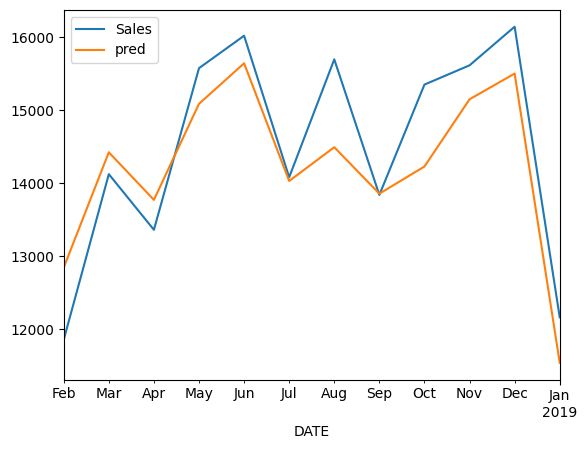

In [ ]:
X_test['pred']=X_train['Sales'][-1]+model.forecast(12).cumsum()
X_test.plot()
performance(X_test['Sales'],X_test['pred'])

#ARIMA

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optim

MAE 608.909679036386
RMSE 788.4055618426274
MAPE 0.04098740298835002


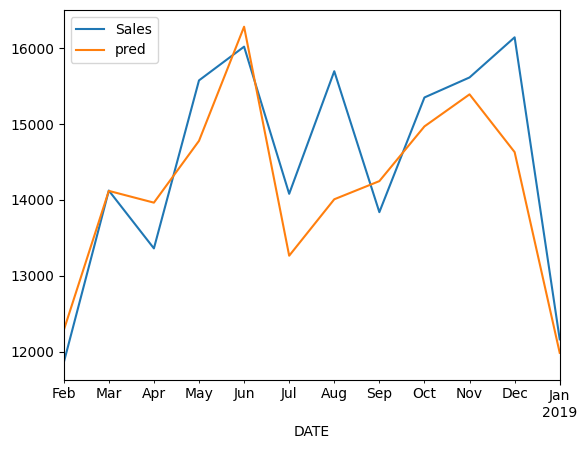

In [ ]:
#no need for stationary series
model=SARIMAX(X_train['Sales'],order=(18,2,18))
model=model.fit()
X_test['pred']=model.forecast(12)
X_test.plot()
performance(X_test['Sales'],X_test['pred'])

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optim

MAE 559.4655403538294
RMSE 640.1197776383539
MAPE 0.03883842545361834


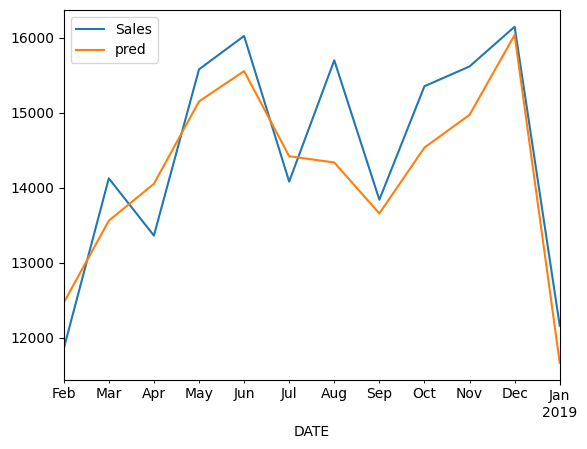

In [ ]:
model=SARIMAX(X_train['Sales'],order=(10,1,4),seasonal_order=(1,1,2,12),max_iter=1000)
model=model.fit()
X_test['pred']=model.forecast(12)
X_test.plot()
performance(X_test['Sales'],X_test['pred'])
